<a href="https://colab.research.google.com/github/tusharsharm/R-Practice/blob/main/LDA_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR DISCREMINANT ANALYSIS
Tushar Sharma

# Install necessary libraries

In [1]:
install.packages('ggplot2')
install.packages('MASS')
install.packages('mvtnorm')
install.packages('MASS')
install.packages('tidyverse')
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




# import libraries

In [2]:
library(MASS)
library(tidyverse)
library(caret)

library(ggplot2)
library(MASS)
library(mvtnorm)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




# Load dataset

In [3]:


theme_set(theme_classic())

# Load the data
data("iris")



# Split the data into training (80%) and test set (20%)

In [4]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.individuals <- iris$Species %>%
			createDataPartition(p = 0.8, list = FALSE)
train.data <- iris[training.individuals, ]
test.data <- iris[-training.individuals, ]



# Estimate preprocessing parameters

In [5]:
# Estimate preprocessing parameters
preproc.parameter <- train.data %>%
preProcess(method = c("center", "scale"))




# Transform the data using the estimated parameters

In [6]:
# Transform the data using the estimated parameters
train.transform <- preproc.parameter %>% predict(train.data)
test.transform <- preproc.parameter %>% predict(test.data)



# Fit the model

In [7]:
# Fit the model
model <- lda(Species~., data = train.transform)



# Make predictions

In [8]:
# Make predictions
predictions <- model %>% predict(test.transform)



# Model accuracy

In [9]:
# Model accuracy
mean(predictions$class==test.transform$Species)

model <- lda(Species~., data = train.transform)
model

[1] 0.9666667

Call:
lda(Species ~ ., data = train.transform)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa       -1.0112835  0.78048647   -1.2900001  -1.2453195
versicolor    0.1014181 -0.68674658    0.2566029   0.1472614
virginica     0.9098654 -0.09373989    1.0333972   1.0980581

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.6794973  0.04463786
Sepal.Width   0.6565085 -1.00330120
Petal.Length -3.8365047  1.44176147
Petal.Width  -2.2722313 -1.96516251

Proportion of trace:
   LD1    LD2 
0.9902 0.0098 

# Graphical plotting of the output

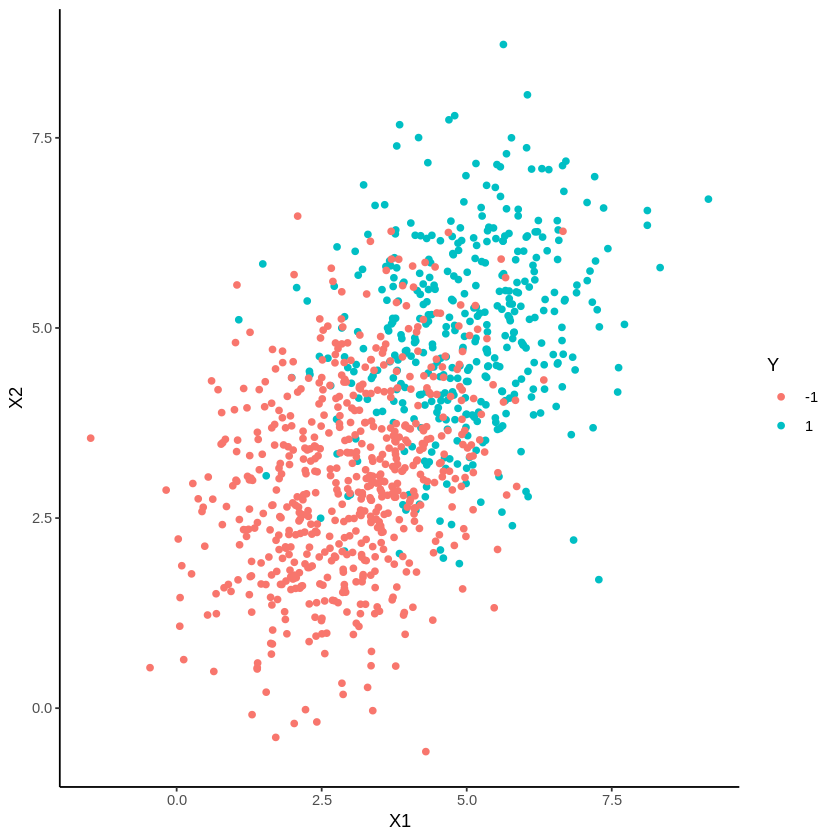

In [10]:
# Variance Covariance matrix for random bivariate gaussian sample
var_covar = matrix(data = c(1.5, 0.4, 0.4, 1.5), nrow = 2)

# Random bivariate Gaussian samples for class +1
Xplus1 <- rmvnorm(400, mean = c(5, 5), sigma = var_covar)

# Random bivariate Gaussian samples for class -1
Xminus1 <- rmvnorm(600, mean = c(3, 3), sigma = var_covar)

# Samples for the dependent variable
Y_samples <- c(rep(1, 400), rep(-1, 600))

# Combining the independent and dependent variables into a dataframe
dataset <- as.data.frame(cbind(rbind(Xplus1, Xminus1), Y_samples))
colnames(dataset) <- c("X1", "X2", "Y")
dataset$Y <- as.character(dataset$Y)

# Plot the above samples and color by class labels
ggplot(data = dataset) + geom_point(aes(X1, X2, color = Y))
